In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the data from the xlsx file
dataFile = 'assets/DunhamsData_Repertory_1937-62.xlsx'
df = pd.read_excel(dataFile, sheet_name='Sheet1')

display(df.columns, df.head())

Index(['Work', 'Also Known As', 'Years Performed',
       'Number of Events Documented',
       'Performers (only for Pieces and Mixed Works)', 'Category',
       'Named Dances in Dances', 'Pieces',
       'Mixed Works (Sometimes Piece or Container)', 'Act-Length Containers',
       'Named Evening-Length Shows', 'Program Notes (Indicative?)',
       'Place Inspiration', 'Composers', 'Venue', 'Notes', 'Sources'],
      dtype='object')

,Work,Also Known As,Years Performed,Number of Events Documented,Performers (only for Pieces and Mixed Works),Category,Named Dances in Dances,Pieces,Mixed Works (Sometimes Piece or Container),Act-Length Containers,Named Evening-Length Shows,Program Notes (Indicative?),Place Inspiration,Composers,Venue,Notes,Sources
0,A Girl She Can't Remain,NaN,1945,3,Byron Cuttler; James Alexander; Katherine Dunh...,Piece/Standalone,NaN,NaN,NaN,NaN,Carib Song,NaN,Caribbean,NaN,c;,NaN,SIU Programs Box 85-86
1,A la Cenote,NaN,1938; 1939; 1940,9,NaN,Piece,NaN,NaN,NaN,Peruvienne,NaN,"""An Inca maiden offers a prayer for her lover;...",Incan empire,Native Air,c;,NaN,SIU Programs Box 85-86 ;
2,A las Montañas,NaN,1938; 1939; 1940,9,NaN,Piece,NaN,NaN,NaN,Peruvienne,NaN,"""A Peruvian woman mourns her native home - the...","""the Motanas, or jungle slopes of the Andes""",Jose Manzanares ; Native Air ;,c,NaN,"Beckford, Ruth. Katherine Dunham: A Biography...."
3,Acaraje,A Preto do Acaraje,1951; 1952; 1953; 1954; 1955; 1957,51,Albert Laguerre; Antonio Rodrigues; Charles Mo...,Piece/Standalone,NaN,NaN,Hommage à Dorival Caymmi,Brazilian Suite; From Brazil,NaN,"""Late at night in the deserted streets of Bahi...","""in the deserted streets of Bahia""",Dorvial Caymmi; Arranged by Bernardo Noriega;,c; n;,Most likely premieres Oct or Nov 1951. Acaraje...,SIU Programs Box 85-86; Rhoda Winter Russell P...
4,Adeus Terras,"""Adeus Terras""",1943; 1949; 1950; 1951,8,Claudia McNeil; Company; Fredye Marshall; Gord...,Piece/Standalone,Capoeira,NaN,NaN,Amazon; Brazilian Suite,NaN,"""En el ataradecer caliente en la Rua do Mangue...",Rua do Mangue de Rio de Janeiro,Adapted by Vadico Gogliano and Nino Nardini; A...,c;,Adeus Terras appears in notes about the elusiv...,SIU Programs Box 85-86; SIU Box 25 Folder 8; S...


____
_Understanding the columns_  
- _Work_: The common name of the piece
- _Also Known As_: Alternative names and variations of the piece 
- _Years Performed_: Years between 1937 - 1962 in which the piece was performed
- _Number of Events Documented_: Approxiamte number of programs and printed documents referencing the performance
- _Performers (only for Pieces and Mixed Works)_: Featured performers
- _Category_: Type of performance
- _Named Dances in Dances_: If the Category is a "Piece" or "Mixed Work"
- _Pieces_: If the Category is "Container", "Mixed Work" or "Show" or if the _Category_ is "Dances in Dances"
- _Mixed Works (Sometimes Piece or Container)_: If the Category is "Container" or "Show" or if the _Category_ is "Dances in Dances" or "Pieces"
- _Act-Length Containers_: If the Category is "Show" or if the _Category_ is "Mixed Work" or "Pieces"
- _Named Evening-Length Shows_: If the Category is "Works", "Container" or "Pieces"
- _Program Notes (Indicative?)_: Represent the common notes that appeared in programs for each performance
- _Place Inspiration_: Preservation of Dunham's descriptive language in program notes
- _Composers_: Attribution
- _Venue_: c -> Concert hall n -> Night club
- _Notes_: Explanatory notes
- _Sources_: Source of materials

___
# Cultural Influence

Cultural influence would be about the 'Program Notes', 'Place Inspiration', '??Named Dances in Dances'  
- The ___Program Notes___           : _Tells us the common story being described_
- The ___Place Inspiration___       : _Where is inspiration for this story taken from?_
- __Category__ : _What type of piece was this_
- ___Named Dances in Dances___      : _Other cultures incorporated_
- ___Years Performed___             : _How long were people interested in this story?_
- ___Number of Events Documented___ : _For how long were people interested in this story?_

In [4]:
cultural_infulence_df = df[['Work',
                            'Program Notes (Indicative?)', 
                            'Place Inspiration', 
                            'Category',
                            'Named Dances in Dances', 
                            'Years Performed', 
                            'Number of Events Documented']]

# Split the 'Years Performed' column by ; and create a new row for each year
cultural_infulence_df = cultural_infulence_df.assign(**{'Years Performed':cultural_infulence_df['Years Performed'].str.split(';')})
# split the 'Years Performed' column into multiple rows
cultural_infulence_df_exploded = cultural_infulence_df.explode('Years Performed')

# Drop the rows where the 'Years Performed' is NaN
cultural_infulence_df_exploded = cultural_infulence_df_exploded.dropna(subset=['Years Performed'])

# Convert the 'Years Performed' to a year
cultural_infulence_df_exploded['Years Performed'] = cultural_infulence_df_exploded['Years Performed'].str.extract(r'(\d{4})')

display(cultural_infulence_df_exploded.sample(5), 
        cultural_infulence_df.shape ,
        cultural_infulence_df_exploded.shape)

,Work,Program Notes (Indicative?),Place Inspiration,Category,Named Dances in Dances,Years Performed,Number of Events Documented
98,Fallin' off a Log,NaN,NaN,Dance,NaN,1943,71
230,Spirituals,"""Deepest expression of despair and hope follow...","""From the plantations of the southern states o...",Piece/Standalone,NaN,1959,59
74,Congo Paillette,"""Danced chiefly in the spring, Congo Paillette...",Haiti,Piece/Standalone,NaN,1939,31
104,Flaming Youth,"""A Memory from the Twenties""",Chicago,Piece/Standalone,Black Bottom; Charleston; Collegeate; Fishtail...,1955,115
220,Shango,"""The ritual dance Shango, takes place in Trini...",Trinidad; Haiti; West Indies;,Piece/Standalone,NaN,1946,145


(276, 7)

(1125, 7)

In [5]:
import nltk
import spacy

# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

2023-09-20 19:45:22.623655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/iffiness/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/iffiness/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/iffiness/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/iffiness/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package pun

True

In [6]:
import locationtagger
from collections import Counter

In [7]:
# Convert items in the 'Program Notes (Indicative?)', 'Place Inspiration', 'Named Dances in Dances' columns to string
cultural_infulence_df_exploded['Program Notes (Indicative?)'] = cultural_infulence_df_exploded['Program Notes (Indicative?)'].astype(str)
cultural_infulence_df_exploded['Place Inspiration'] = cultural_infulence_df_exploded['Place Inspiration'].astype(str)
cultural_infulence_df_exploded['Named Dances in Dances'] = cultural_infulence_df_exploded['Named Dances in Dances'].astype(str)

# Extract the countries from the 'Program Notes (Indicative?)', 'Place Inspiration', 'Named Dances in Dances' columns
program_notes_entities     = locationtagger.find_locations(text = ' '.join(cultural_infulence_df_exploded['Program Notes (Indicative?)'].unique()))
place_inspiration_entities = locationtagger.find_locations(text = ' '.join(cultural_infulence_df_exploded['Place Inspiration'].unique()))

# getting all country names // IMPORANT
print("The countries in text : ")
print(f"Program notes {program_notes_entities.countries} \nPlace inspirations : {place_inspiration_entities.countries}")

# getting all country regions // IMPORANT
print("The countries regions in text : ")
print(f"Program notes {program_notes_entities.country_regions} \nPlace inspirations : {place_inspiration_entities.country_regions}")
 
# getting all country cities // IMPORANT
print("The countries cities in text : ")
print(f"Program notes {program_notes_entities.country_cities} \nPlace inspirations : {place_inspiration_entities.country_cities}")
 
# getting all other countries // IMPORANT
print("All other countries in text : ")
print(f"Program notes {program_notes_entities.other_countries} \nPlace inspirations : {place_inspiration_entities.other_countries}")
 
# getting all region cities // IMPORANT
print("The region cities in text : ")
print(f"Program notes {program_notes_entities.region_cities} \nPlace inspirations : {place_inspiration_entities.region_cities}")
 
# getting all other regions // IMPORANT
print("All other regions in text : ")
print(f"Program notes {program_notes_entities.other_regions} \nPlace inspirations : {place_inspiration_entities.other_regions}")
 
# getting all other entities
print("All other entities in text : ")
print(f"Program notes {program_notes_entities.other} \nPlace inspirations : {place_inspiration_entities.other}")

The countries in text : 
Program notes ['Cuba', 'Congo', 'Colombia', 'Mexico', 'Martinique', 'Argentina', 'Philippines', 'Haiti', 'Brazil', 'Angola'] 
Place inspirations : ['Puerto Rico', 'Cuba', 'Mexico', 'Spain', 'Haiti', 'Brazil', 'Martinique']
The countries regions in text : 
Program notes {'France': ['North', 'Paris'], 'Japan': ['Okinawa'], 'Brazil': ['Bahia', 'Rio de Janeiro'], 'New Zealand': ['Southland'], 'Mexico': ['Veracruz'], 'Cuba': ['Havana']} 
Place inspirations : {'France': ['North'], 'United States': ['Missouri'], 'Japan': ['Okinawa'], 'Brazil': ['Bahia'], 'Mexico': ['Veracruz'], 'Cuba': ['Havana']}
The countries cities in text : 
Program notes {'France': ['Paris'], 'United States': ['Mexico', 'Havana', 'Paris', 'Harlem', 'Cuba', 'Jack', 'Trinidad', 'Brazil', 'Angola', 'Bahama', 'Aztec', 'Rio', 'North', 'Century', 'Island', 'Andes', 'Lotus'], 'Argentina': ['Buenos Aires'], 'Spain': ['Inca'], 'Brazil': ['Rio de Janeiro', 'Lavinia'], 'Colombia': ['Barranquilla'], 'Mexico'

The countries and regions are important as they give an idea of what is happening.  
As we can see there are a lot of places listed in the _Program notes_ and the _place inspiration_.  

Now I'm interested in connecting these places with _Years Performed_ and _Number of Events Documented_

In [8]:
# Convert items in the 'Program Notes (Indicative?)', 'Place Inspiration', 'Named Dances in Dances' columns to string
cultural_infulence_df['Program Notes (Indicative?)'] = cultural_infulence_df['Program Notes (Indicative?)'].astype(str)
cultural_infulence_df['Place Inspiration'] = cultural_infulence_df['Place Inspiration'].astype(str)
cultural_infulence_df['Named Dances in Dances'] = cultural_infulence_df['Named Dances in Dances'].astype(str)

# For each row in the 'Program Notes (Indicative?)' column, find the countries and regions and add to the 'Notes Countries' column
cultural_infulence_df['Notes Countries'] = cultural_infulence_df['Program Notes (Indicative?)'].apply(lambda x: ','.join(locationtagger.find_locations(text = x).countries + locationtagger.find_locations(text = x).other_countries))

# For each row in the 'Place Inspiration' column, find the countries and regions and add to the 'Inspiration Countries' column
cultural_infulence_df['Inspiration Countries'] = cultural_infulence_df['Place Inspiration'].apply(lambda x: ','.join(locationtagger.find_locations(text = x).countries + locationtagger.find_locations(text = x).other_countries))

In [10]:
display(cultural_infulence_df.shape,
        cultural_infulence_df.sample(5),
        cultural_infulence_df['Category'].value_counts())

(276, 9)

,Work,Program Notes (Indicative?),Place Inspiration,Category,Named Dances in Dances,Years Performed,Number of Events Documented,Notes Countries,Inspiration Countries
156,Maracas,nan,nan,Piece,nan,NaN,1,,
243,Tack Annie,nan,nan,Dance,nan,"[1943, 1944, 1945, 1954]",30,,
74,Congo Paillette,"""Danced chiefly in the spring, Congo Paillette...",Haiti,Piece/Standalone,nan,"[1937, 1938, 1939, 1943, 1945, 1946, 194...",31,Congo,Haiti
268,Woman is a Rascal,nan,Caribbean;,Piece/Standalone,nan,NaN,3,,
235,Street Scene (Port Au Prince),nan,"Port-au-Prince, Haiti",Piece/Standalone,nan,"[1943, 1944, 1945]",23,,"Haiti,Haiti"


Category
Piece/Standalone    111
Piece                80
Dance                46
Container            22
Show                  9
Mix                   8
Name: count, dtype: int64

- Of the 278 works, 78 works have a country or region mentioned in the Program Notes and 77 works have a country or region in the Place Inspiration. 
- The maximum number of events documented is 177 over a period of 17 years, from 1939-1962
- 4 Works were never documented:
    - Drum Session
    - Octaroon Ball
    - Spanish Earth Suite
    - Clarence
- 47 works documented once
- It's also important to know what years the Works were performed. Of the 276 works, 157 have 'Years Performed' values.
- Of the categories they are split into:
    - 111 Piece/Standalone
    - 80 Piece
    - 46 Dance
    - 22 Container
    - 9 Show
    - 8 Mix

Because I'm trying to acertain which years were influenced by what countries, I'm eliminating the data without _Years Performed_ and the _Notes Countried_ and _Inspiration Countries_ without values which leaves me with 93 rows of the initial 276

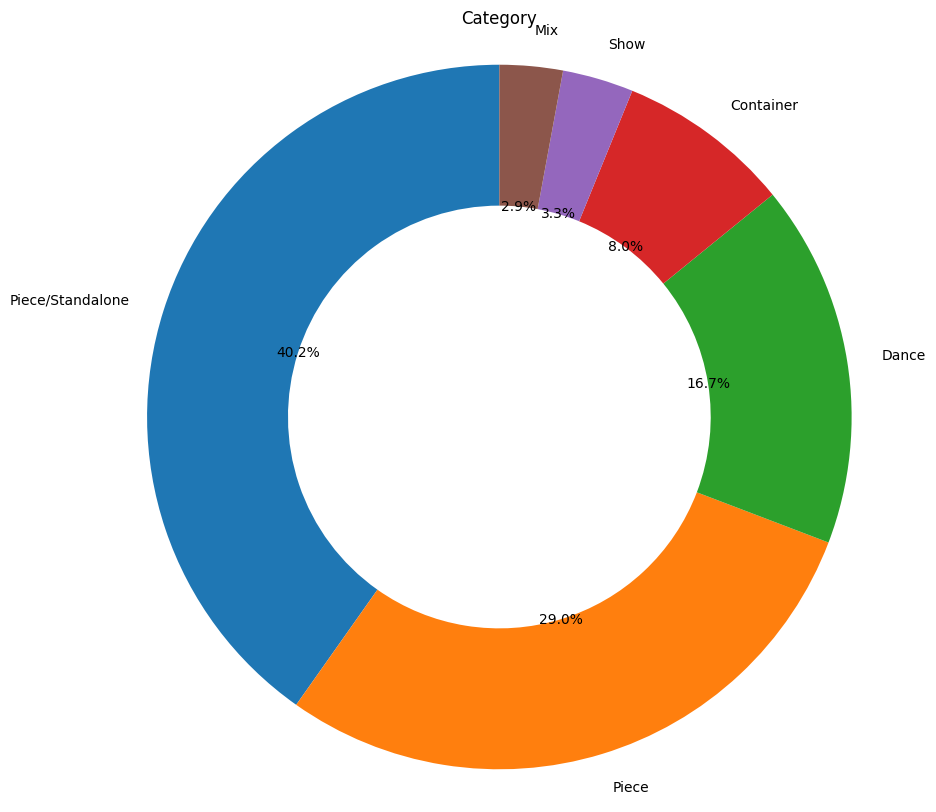

In [14]:
# Plot the Category column value counts as a donut chart

# Define data and labels
data = cultural_infulence_df['Category'].value_counts()
labels = cultural_infulence_df['Category'].value_counts().index

# Create a donut chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, text, autotexts = ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

# Add a circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.2, color='white')
fig.gca().add_artist(center_circle)

# Set the aspect ratio to be equal so that the circle appears circular
ax.axis('equal')

# Set the title
ax.set_title('Category')

# Show the plot
plt.show()


In [ ]:
# Show the data which has the 'Years Performed' column not empty
cultural_infulence_df_with_Years = cultural_infulence_df[cultural_infulence_df['Years Performed'].notna()]
# Remove the data which has the 'Notes Countries' and 'Inspiration Countries' columns empty
cultural_infulence_df_with_Years = cultural_infulence_df_with_Years[cultural_infulence_df_with_Years['Place Inspiration'] != 'nan']

# Count the 'Years Performed' column and add to the 'Years Performed Count' column
cultural_infulence_df_with_Years['Years Performed Count'] = cultural_infulence_df_with_Years['Years Performed'].apply(lambda x: len(x))

# Sort but Note Countries and Inspiration Countries
cultural_infulence_df_with_Years = cultural_infulence_df_with_Years.sort_values(by=['Years Performed Count',
                                                                                    'Number of Events Documented',
                                                                                    'Notes Countries', 
                                                                                    'Inspiration Countries'],
                                                                                ascending=False).reset_index(drop=True)
# Remove the Work with value 'Erzulie Moundong' as it doesn't make sense
cultural_infulence_df_with_Years = cultural_infulence_df_with_Years[cultural_infulence_df_with_Years['Work'] != 'Erzulie Moundong']

display(cultural_infulence_df_with_Years, cultural_infulence_df_with_Years.shape)

Looking at the data currently, the _Program Notes_ column contains nan values. Not bad ...   
The _Notes Countries_ also contains a lot of empty rows.  

It doesn't make sense that the _Erzulie Moundong_ has 1 Event documented but was performed in 1946 and 1947 ! _So I'm excuding it because it is just not possible_

Sooo ...  
Q1. Where does she get inspiration from?  
... This must have to do with the _Place Inspiration_ and the consequent _Inspiration Countries_

In [ ]:
cultural_infulence_df_with_Years['Place Inspiration'].value_counts().to_frame()

# Merge the 'Place Inspiration' and 'Inspiration Countries' columns and count the values
inspiration_base = cultural_infulence_df_with_Years[['Place Inspiration', 'Inspiration Countries']].values.tolist()
inspiration_base = [item for sublist in inspiration_base for item in sublist] 

# print(f"Inspiration {inspiration_base}")

# Count the values and convert to a dataframe
inspiration = []
for i in inspiration_base:
    splits = i.replace('"', '').split(',')
    splits = splits[0].split(';')
    # remove the empty string and spaces before the string
    splits = [x.strip() for x in splits if x.strip()]
    inspiration.extend(splits)

# For each item in the list, check if it is a substring of another item in the list and remove the bigger string while keeping the smaller string and incrementing its count
for i in inspiration:
    for j in inspiration:
        if i in j and i != j:
            inspiration.remove(j)
            # Add a duplicate of the smaller string to the list
            inspiration.append(i)
            # print(f"{i} :: {j}")

# Replace 'America' with 'United States'
inspiration = [x.replace('America', 'United States') for x in inspiration]

inspiration = pd.DataFrame(inspiration, columns=['Inspiration'])
inspiration = inspiration['Inspiration'].value_counts().to_frame().reset_index()

display(inspiration)

In [ ]:
# Get the rows with count greater than 1
inspiration = inspiration[inspiration['count'] > 2]
# Make a donut chart for the 'Inspiration' column
donut = plt.Circle((0,0),0.9,color='white', fc='white',linewidth=1.25, zorder = 1.5)

plt.pie(inspiration['count'], 
        labels=inspiration['Inspiration'], 
        wedgeprops={'linewidth':.9,'edgecolor':'white', 'width': 0.125}, 
        autopct='%1.1f%%', 
        pctdistance=0.8,
        startangle=90,
        textprops={'fontsize': 10},
        radius=1.75,
        colors=sns.color_palette("pastel", len(inspiration[inspiration['count']>2])),
        rotatelabels=True,
        center=(0,0),
        labeldistance=1.025,
        counterclock=False,
        explode=[0.05]*len(inspiration['Inspiration']),
        )
p = plt.gcf()
p.gca().add_artist(donut)
plt.show()

I can conclude that most of her cultural inspiration was taken from _Haiti, United States, Cuba_ and _Brazil_   
Now what cultures did she influence ? 


In [ ]:
cultural_infulenced = df[['Work','Named Dances in Dances']].merge(cultural_infulence_df_with_Years[['Work','Years Performed','Notes Countries', 'Years Performed Count']], on='Work')
cultural_infulenced = cultural_infulenced[['Work', 'Years Performed', 'Notes Countries', 'Named Dances in Dances', 'Years Performed Count']]

# Are the 'Named Dances in Dances' column and 'Work' column similar?
# Drop NaN values in the 'Named Dances in Dances' column and save in a list
named_dances = cultural_infulenced.dropna(subset=['Named Dances in Dances'])['Named Dances in Dances'].values.tolist()
# Split named_dances by ;
named_dances = [item.strip() for sublist in named_dances for item in sublist.split(';')]

# Look at the 'Work' column and save in a list
work = cultural_infulenced['Work'].values.tolist()

# Are the named_dances in the work?
named_dances_in_work = [x for x in named_dances if x in work]

display(cultural_infulenced.dropna(subset=['Named Dances in Dances']), len(sorted(named_dances_in_work)))

The _Named Dances in Dances_ are not _Work_  URGHHHH   
The next thing is to look at what _Work_ has common _Named Dances in Dances_  in a density map?


In [ ]:
cultural_infulenced = cultural_infulenced.dropna(subset=['Named Dances in Dances'])[['Work', 'Years Performed', 'Named Dances in Dances', 'Years Performed Count']].reset_index(drop=True)
# There are less 'Work' than 'Named Dances in Dances' obviously so I encode the 'Work' to do a sort of density plot for the 'Named Dances in Dances' column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cultural_infulenced['Work Encoded'] = le.fit_transform(cultural_infulenced['Work'])

display(cultural_infulenced)

In [ ]:
density_df = cultural_infulenced[['Work Encoded', 'Named Dances in Dances', 'Years Performed Count']]

# Split the 'Named Dances in Dances' column by ; and create a new row for each value
density_df = density_df.assign(**{'Named Dances in Dances':density_df['Named Dances in Dances'].str.split(';')})
# split the 'Named Dances in Dances' column into multiple rows
density_df = density_df.explode('Named Dances in Dances')
# Convert the values of the 'Named Dances in Dances' column to a string
density_df['Named Dances in Dances'] = density_df['Named Dances in Dances'].astype(str)
# In the 'Named Dances in Dances' column, remove the spaces before and after the string
density_df['Named Dances in Dances'] = density_df['Named Dances in Dances'].apply(lambda x: x.strip())
# In the 'Named Dances in Dances' column, 'Snake Hips' is the same as 'Snakehips'
density_df['Named Dances in Dances'] = density_df['Named Dances in Dances'].apply(lambda x: 'Snakehips' if x == 'Snake Hips' else x)
# If the value of the 'Named Dances in Dances' contains '[Dances in Dances]' then replace the entire string with what is before '[Dances in Dances]'
density_df['Named Dances in Dances'] = density_df['Named Dances in Dances'].apply(lambda x: x.split(' [Dances in Dances]')[0])
# Create a column for the number of occurances of each value in the 'Named Dances in Dances' column
density_df['Named Dances in Dances Count'] = density_df.groupby('Named Dances in Dances')['Named Dances in Dances'].transform('count')
# Reset the index
density_df = density_df.reset_index(drop=True)

display(density_df.sort_values(by=['Years Performed Count'], ascending=False).reset_index(drop=True))

In [ ]:
# Make a density plot for the 'Named Dances in Dances' column
sns.scatterplot(data=density_df, 
                y='Work Encoded', 
                x='Years Performed Count', 
                size='Years Performed Count', 
                hue='Work Encoded', 
                legend=False, 
                sizes=(50, 500), 
                alpha=0.75)
# Set color palette to range between two colors: e1f7fa and ffa72b 
#  Take off the bounding box
sns.despine(left=False, bottom=False)
# Change the color of the bounding box
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')
# Change the opacity of the bounding box
plt.gca().spines['bottom'].set_alpha(0.5)
plt.gca().spines['left'].set_alpha(0.5)
# Change the y ticks to the equivalent 'Work' values
plt.yticks(np.arange(len(cultural_infulenced['Work'].unique())), cultural_infulenced['Work'].unique(), rotation=0)
# Rotate the x ticks
plt.xticks(rotation=0)
# Make the height of the plot bigger
plt.gcf().set_size_inches(10, 8)
# Add trace lines
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Rename the x axis
plt.ylabel('Work', fontsize=14)
plt.xlabel('Years Performed Count', fontsize=14)
# Change the figure background color
plt.gcf().set_facecolor('#1d1330')
# Change the plot background color
plt.gca().set_facecolor('#1d1330')
# Change the color of the text
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
# Change the color of the labels
plt.ylabel('Work', color='white')
plt.xlabel('Years Performed Count', color='white')
# Change the color of the title
plt.title('Density Plot of Works', color='white', fontsize=16)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random data
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(0, 1, 1000)

# Create a 3D density plot with spikes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=20)
xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])
xpos = xpos.flatten() / 2.
ypos = ypos.flatten() / 2.
zpos = np.zeros_like(xpos)
dx = dy = 0.1 * np.ones_like(zpos)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('3D Density Plot with Spikes')

# Show the plot
plt.show()
